House Price Prediction Model

In [65]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Get Data

In [66]:
train = pd.read_csv('train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [67]:
test = pd.read_csv('test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


2. EDA

a. Data Visualization

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


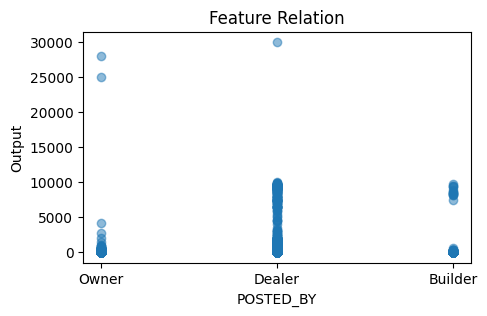

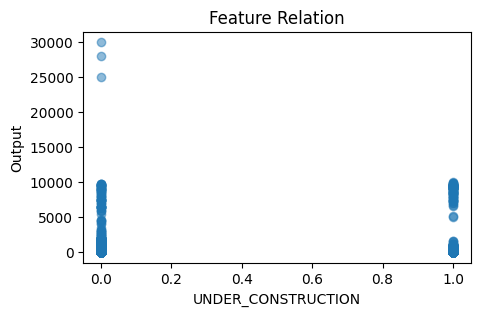

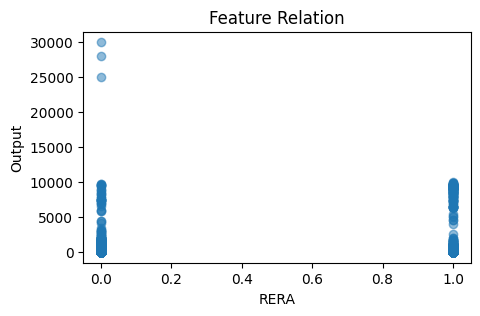

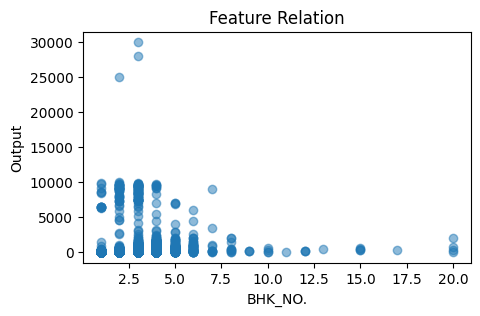

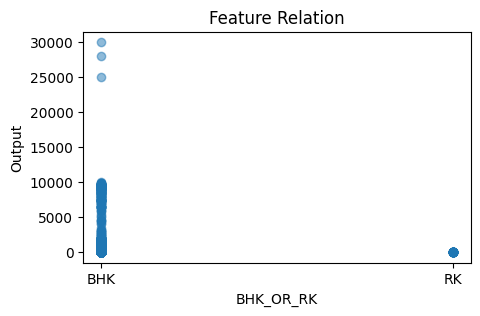

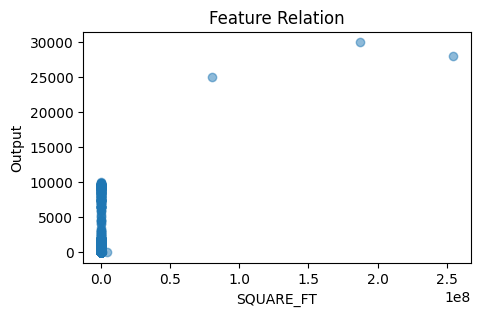

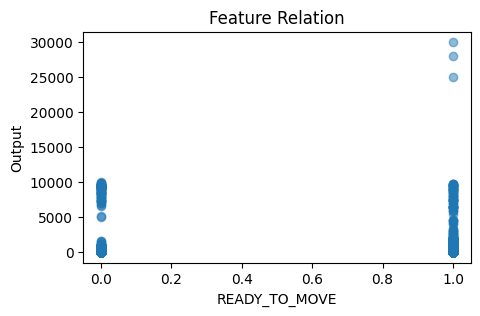

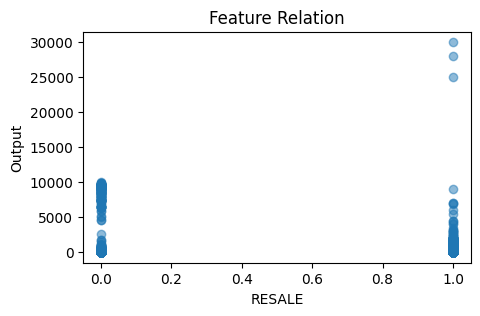

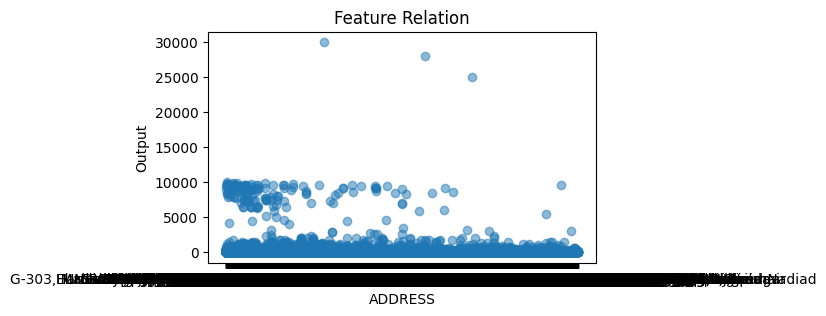

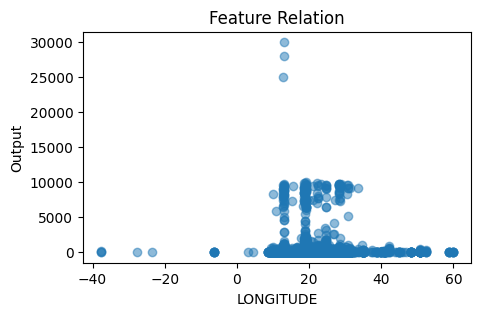

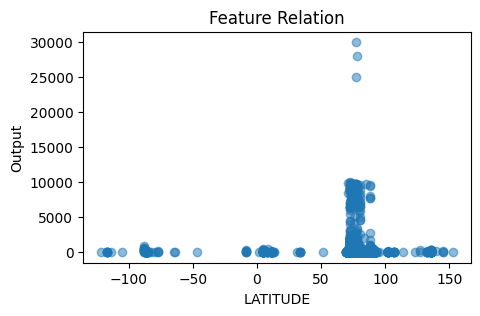

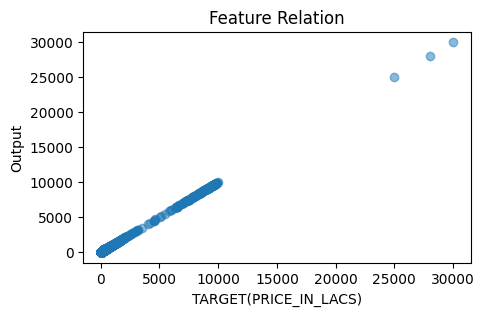

In [69]:
for i in train.columns:
    plt.figure(figsize=(5,3))
    plt.scatter(train[i], train["TARGET(PRICE_IN_LACS)"], alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Output')
    plt.title('Feature Relation')
    plt.show()

b. Feature Selection

In [70]:
train.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [71]:
train = train.drop("ADDRESS", axis=1)
train = train.drop("BHK_OR_RK", axis=1)

In [72]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


c. Removing Missing Values

In [73]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

3. Preprocessing - Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["POSTED_BY"] = encoder.fit_transform(train["POSTED_BY"])
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,2,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


4. Splitting Into Train and Test Sets

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x = train
x = train.drop("TARGET(PRICE_IN_LACS)", axis=1)
y = train["TARGET(PRICE_IN_LACS)"]

In [77]:
x.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,2,0,0,2,1300.236407,1,1,12.969910,77.597960
1,1,0,0,2,1275.000000,1,1,12.274538,76.644605
2,2,0,0,2,933.159722,1,1,12.778033,77.632191
3,2,0,1,2,929.921143,1,1,28.642300,77.344500
4,1,1,0,2,999.009247,0,1,22.592200,88.484911


In [78]:
y.head()

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

5. Picking An Algorithm And Training Model

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

6. Evaluating The Model

In [81]:
# Prediction
y_pred = model.predict(x_test)
# MSE, MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)

In [82]:
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Absolute Error:  131.86956778249777
Mean Squared Error:  325915.007872126
Root Mean Squared Error:  570.8896634833442


6. Saving The Model

In [84]:
from joblib import dump
dump(model, 'House_Price_Prediction_Model.joblib')

['House_Price_Prediction_Model.joblib']